# Reference
Ising formulations of many NP problems  
Andrew Lucas  
https://arxiv.org/abs/1302.5843

# Maxcut
The maxcut problem is to see if you can cross as many edges as possible in a single stroke.

## Hamiltonian
The hamiltonian of maxcut is

$$H = -\sum_{i,j}\frac{1}{2}(1-z_iz_j)$$

z takes a value of 1 or -1, corresponding to the value of each vertex.

## Example
Let's solve a graph problem with five points and six edges. First, let's draw the graph.

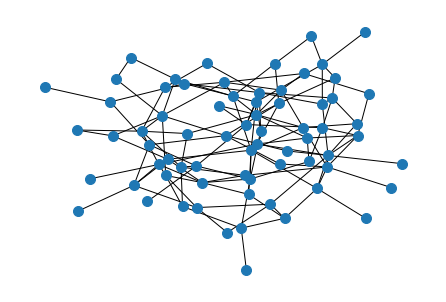

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

n = 70
m = 130
seed = 14

options = {'node_size': 100}

G = nx.gnm_random_graph(n, m, seed = seed)
nx.draw(G, **options)

## Solving with a simulator
Here, we will use QAOA to solve the problem on a simulator.

sample:1000110110100111001001011000001000111110110100101001001111100100111101


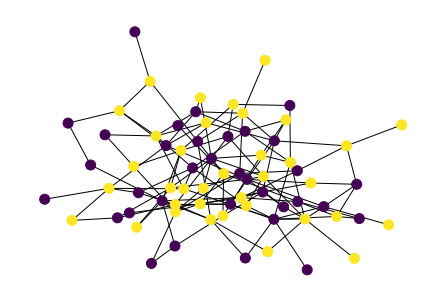

In [4]:
from blueqat.pauli import Z
from blueqat.utils import qaoa
import numpy as np
import time

hamiltonian = sum(Z[e[0]]*Z[e[1]] for e in G.edges)
step = 1

result = qaoa(hamiltonian, step)
b = result.circuit.run(shots=10)
sample = b.most_common(1)[0][0]

print("sample:"+ str(sample))

nx.draw(G, **options, node_color=[int(s) for s in list(sample)])

The edges between the vertices of different colors will be cut.

# Exact Cover

We are given a set $ U = {1,....,n}$ and we are also given a number of sets $V_i \in U \{1,....,n\}$. The problem states that if we form a set of sets of the above given sets, is there a subset of the above set whose elements are disjoint sets and the union of the sets is U.

## QUBO

We have a binary variable $q_i$ which is $1$ if the given subset $V_i$ is included and 0 otherwise. Considering the sets are disjoint and an element of the set $U$ belongs to just one set, we define the Hamiltonian of the given problem in the following way:
$$ H = \sum_{\alpha=1}^{n} ( 1 - \sum_{i:\alpha\in V_i} q_i)^2$$

## Solving with a simulator
Here, we will use QAOA to solve the problem on a simulator.

In [3]:
import numpy as np
from blueqat.pauli import qubo_bit as q
from blueqat.utils import qaoa

U = np.array([1, 2, 3])
V_size = 3

V = np.array([[1,2],[1],[3]],dtype=object)

hamiltonian = 0.0
temp = 0.0
for i in range(U.size):
    for j in range(V.size):
        if((np.where(V[j] == U[i]))[0].size > 0):
            temp+= q(j)
    hamiltonian += (1 - temp)**2
    temp = 0.0

In [5]:
step = 1

result = qaoa(hamiltonian, step)
b = result.circuit.run(shots=10)
sample = b.most_common(1)[0][0]
print(sample)

101
